In [2]:
# Sources
# https://python-chess.readthedocs.io/en/latest/
# https://github.com/rogerfitz/tutorials/tree/master/python_chess

#Read:
#https://onlinelibrary.wiley.com/doi/10.1002/asmb.2684

     -------------------------------------- 149.1/149.1 kB 3.0 MB/s eta 0:00:00


In [1]:
!pip install chess
!pip install Stockfish


                                              0.0/149.1 kB ? eta -:--:--
     -------------------------------        122.9/149.1 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 149.1/149.1 kB 2.2 MB/s eta 0:00:00


In [1]:
import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime
import tqdm
import zipfile
import re

In [2]:
from stockfish import Stockfish
import chess
import chess.engine
import chess.svg
import chess.pgn
import re
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import matplotlib.pyplot as plt
import pickle
%matplotlib inline



In [3]:
# NUM_GAMES= 1000
# rows=[]

# with open(f'data/general_games.pgn') as pgn:
#     for game in tqdm.tqdm(range(NUM_GAMES)):
#         row={}
#         game = chess.pgn.read_game(pgn)
#         row['headers']=game.headers.__dict__
#         row['moves']=[x.uci() for x in game.mainline_moves()]
#         rows.append(row)
# games=pd.DataFrame(rows)
# games
# games.to_csv("data/general.csv",index=False)


In [4]:
def replace_numbers(string):
    pattern = r'\d'  # Matches any digit
    result = re.sub(pattern, lambda match: 'X' * int(match.group()), string)
    return result
def get_piece_position(fen, piece):
    # Split the FEN string into its components
    fen_parts = fen.split(' ')
    # Extract the board position part of the FEN
    board_fen = fen_parts[0]
    # Remove the slashes (/) to get a string of all the pieces
    board_fen = board_fen.replace('/', '')
    board_fen = replace_numbers(board_fen)
    
    # Find the indices of the piece in the string
    indices = []
    for index, char in enumerate(board_fen):
        if char == piece:
            indices.append(index)
    
    # Calculate the rows and columns based on the indices
    positions = []
    for index in indices:
        row = 7 - (index // 8)
        column = index % 8
        positions.append((row, column))
    
    return positions

def save_list(list_save, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(list_save, file)

def load_list(file_path):
    with open(file_path, 'rb') as file:
        chess_data = pickle.load(file)
    return chess_data
# Example usage
fen = "rnbqkbnr/pppppppN/8/8/8/8/PPNPPPPP/RBNQKBNR w KQkq - 0 1"
knight_position = get_piece_position(fen, "N")
print("Knight Position: ", knight_position)

Knight Position:  [(6, 7), (1, 2), (0, 2), (0, 6)]


In [5]:
games=pd.read_csv("data/general.csv")
games['moves']=games['moves'].apply(lambda x: eval(x))
#games['headers']=games['headers'].apply(lambda x: eval(x))#to dict
games

,headers,moves
0,"{'_tag_roster': {'Event': '?', 'Site': '?', 'D...","[e2e4, e7e6, d2d4, d7d5, b1c3, f8b4, e4e5, g8e..."
1,{'_tag_roster': {'Event': 'Skopje Solidarnost-...,"[c2c4, g8f6, b1c3, e7e6, g1f3, f8b4, d1c2, c7c..."
2,{'_tag_roster': {'Event': 'Skopje Solidarnost-...,"[c2c4, g8f6, b1c3, d7d5, c4d5, f6d5, g2g3, g7g..."
3,"{'_tag_roster': {'Event': 'Yerevan', 'Site': '...","[g1f3, c7c5, g2g3, b7b5, a2a4, b5a4, f1g2, c8b..."
4,"{'_tag_roster': {'Event': 'URS Team-Cup09', 'S...","[g1f3, g7g6, e2e4, d7d6, d2d4, g8f6, b1c3, f8g..."
...,...,...
994,{'_tag_roster': {'Event': 'FRA-chT Top 16 Gp H...,"[d2d4, d7d5, c2c4, e7e6, b1c3, f8b4, g1f3, g8f..."
995,"{'_tag_roster': {'Event': 'BIH-chT', 'Site': '...","[e2e4, c7c5, g1f3, b8c6, d2d4, c5d4, f3d4, g8f..."
996,"{'_tag_roster': {'Event': 'BIH-chT', 'Site': '...","[d2d4, g8f6, c2c4, e7e6, g1f3, b7b6, g2g3, c8b..."
997,"{'_tag_roster': {'Event': 'BIH-chT', 'Site': '...","[e2e4, c7c5, g1f3, b8c6, b1c3, e7e5, f1c4, d7d..."


In [6]:
# df[a][b][c][d] = array of CPL of piece a at location (b, c) of color d
#0 = knight, 1, a, white
#df = np.zeros((2, 8, 8,2,1,), dtype=float)
# df = [[[[[0]] * 2] * 8] * 8] * 2
# #df
# # df = np.arange(256)
# # df = np.reshape(df, (2, 8, 8,2,1))
# df[0][0][0][0]
# df[1][7][7][1]

In [7]:
engine = Stockfish("stockfish-windows-2022-x86-64-avx2.exe")
engine.set_depth(20)
engine.set_skill_level(20)
board=chess.Board()


In [8]:
pieces = ['P', 'p']

In [9]:
#df = [[[[[0] for _ in range(2)] for _ in range(8)] for _ in range(8)] for _ in range(2)]


In [10]:
#df[1][7][7][1]

In [11]:
import pandas as pd

columns = ['piece', 'color', 'row', 'column', 'cpl']
chess_df = pd.DataFrame(columns=columns)
print(chess_df)


Empty DataFrame
Columns: [piece, color, row, column, cpl]
Index: []


In [12]:
import pandas as pd

for i in tqdm.tqdm(range(0, 501)):
    try:
        board = chess.Board()
        curr_game = games.iloc[i]
        print(curr_game['moves'][0])
        for move_number, san in enumerate(curr_game['moves']):
            move = board.push_san(san)
            engine.set_fen_position(board.fen())
            evaluation = engine.get_evaluation()
            data = {'piece': [], 'color': [], 'row': [], 'column': [], 'cpl': []}
            for index, piece in enumerate(pieces):
                positions = get_piece_position(board.fen(), piece)
                for row, col in positions:
                    data['piece'].append(0)
                    data['color'].append(index % 2)
                    data['row'].append(row)
                    data['column'].append(col)
                    data['cpl'].append(evaluation['value'])
            chess_df = pd.concat([chess_df, pd.DataFrame(data)], ignore_index=True)
        if i % 100 == 0:
            chess_df.to_csv('data/pawn_' + str(int(i/100)) + '.csv', index=False)
    except Exception as e:
        print("An exception occurred:", str(e))
        continue


  0%|                                                                                          | 0/501 [00:00<?, ?it/s]

e2e4


  0%|▏                                                                             | 1/501 [01:57<16:20:37, 117.67s/it]

c2c4


  0%|▎                                                                             | 2/501 [03:57<16:26:49, 118.66s/it]

c2c4


  1%|▍                                                                             | 3/501 [05:51<16:08:10, 116.65s/it]

g1f3


  1%|▌                                                                             | 4/501 [07:39<15:38:32, 113.31s/it]

g1f3


  1%|▊                                                                              | 5/501 [08:35<12:45:19, 92.58s/it]

e2e4


  1%|▉                                                                              | 6/501 [09:17<10:22:11, 75.42s/it]

e2e4


  1%|█                                                                               | 7/501 [09:49<8:25:10, 61.36s/it]

e2e4


  2%|█▎                                                                              | 8/501 [10:11<6:39:32, 48.63s/it]

e2e4


  2%|█▍                                                                              | 9/501 [11:59<9:11:38, 67.27s/it]

g1f3


  2%|█▌                                                                             | 10/501 [12:22<7:18:18, 53.56s/it]

e2e4


  2%|█▋                                                                             | 11/501 [13:06<6:54:46, 50.79s/it]

e2e4


  2%|█▉                                                                             | 12/501 [14:24<8:00:17, 58.93s/it]

e2e4


  3%|██                                                                             | 13/501 [15:08<7:23:33, 54.54s/it]

g1f3


  3%|██▏                                                                           | 14/501 [17:10<10:07:08, 74.80s/it]

c2c4


  3%|██▎                                                                           | 15/501 [18:23<10:00:38, 74.15s/it]

e2e4


  3%|██▍                                                                           | 16/501 [19:54<10:40:36, 79.25s/it]

c2c4


  3%|██▋                                                                           | 17/501 [21:26<11:10:30, 83.12s/it]

e2e4


  4%|██▊                                                                           | 18/501 [22:39<10:44:46, 80.10s/it]

d2d4


  4%|██▉                                                                            | 19/501 [23:34<9:44:22, 72.74s/it]

e2e4


  4%|███▏                                                                           | 20/501 [24:30<9:02:26, 67.66s/it]

e2e4


  4%|███▎                                                                           | 21/501 [25:59<9:51:40, 73.96s/it]

e2e4


  4%|███▍                                                                          | 22/501 [27:20<10:07:31, 76.10s/it]

e2e4


  5%|███▋                                                                           | 23/501 [28:31<9:55:14, 74.72s/it]

e2e4


  5%|███▊                                                                           | 24/501 [29:09<8:26:05, 63.66s/it]

g1f3


  5%|███▉                                                                           | 25/501 [30:13<8:26:10, 63.80s/it]

c2c4


  5%|████                                                                           | 26/501 [30:40<6:55:34, 52.49s/it]

g1f3


  5%|████▎                                                                          | 27/501 [32:22<8:53:27, 67.53s/it]

d2d4


  6%|████▍                                                                          | 28/501 [33:50<9:41:20, 73.74s/it]

e2e4


  6%|████▌                                                                          | 29/501 [34:49<9:03:05, 69.04s/it]

d2d4


  6%|████▋                                                                          | 30/501 [35:30<7:56:46, 60.74s/it]

d2d4


  6%|████▉                                                                          | 31/501 [36:49<8:40:07, 66.40s/it]

c2c4


  6%|█████                                                                          | 32/501 [37:05<6:40:23, 51.22s/it]

e2e4


  7%|█████▏                                                                         | 33/501 [38:25<7:45:02, 59.62s/it]

e2e4


  7%|█████▎                                                                         | 34/501 [38:54<6:33:37, 50.57s/it]

e2e4


  7%|█████▌                                                                         | 35/501 [39:18<5:30:53, 42.60s/it]

e2e4


  7%|█████▋                                                                         | 36/501 [39:39<4:40:15, 36.16s/it]

e2e4


  7%|█████▊                                                                         | 37/501 [39:59<4:02:45, 31.39s/it]

d2d4


  8%|█████▉                                                                         | 38/501 [40:49<4:45:25, 36.99s/it]

g1f3


  8%|██████▏                                                                        | 39/501 [41:48<5:34:55, 43.50s/it]

e2e4


  8%|██████▎                                                                        | 40/501 [42:44<6:02:38, 47.20s/it]

g1f3


  8%|██████▍                                                                        | 41/501 [43:20<5:35:23, 43.75s/it]

e2e4


  8%|██████▌                                                                        | 42/501 [44:13<5:57:06, 46.68s/it]

d2d4


  9%|██████▊                                                                        | 43/501 [44:56<5:47:48, 45.57s/it]

e2e4


  9%|██████▉                                                                        | 44/501 [46:01<6:32:00, 51.47s/it]

e2e4


  9%|███████                                                                        | 45/501 [46:32<5:43:15, 45.17s/it]

g1f3


  9%|███████▎                                                                       | 46/501 [46:53<4:47:01, 37.85s/it]

d2d4


  9%|███████▍                                                                       | 47/501 [47:42<5:11:53, 41.22s/it]

d2d4


 10%|███████▌                                                                       | 48/501 [48:26<5:17:39, 42.07s/it]

c2c4


 10%|███████▋                                                                       | 49/501 [49:22<5:49:22, 46.38s/it]

d2d4


 10%|███████▉                                                                       | 50/501 [50:03<5:35:52, 44.68s/it]

d2d4


 10%|████████                                                                       | 51/501 [51:02<6:07:41, 49.03s/it]

e2e4


 10%|████████▏                                                                      | 52/501 [52:25<7:23:03, 59.21s/it]

e2e4


 11%|████████▎                                                                      | 53/501 [52:55<6:15:40, 50.31s/it]

c2c4


 11%|████████▌                                                                      | 54/501 [53:54<6:34:34, 52.96s/it]

c2c4


 11%|████████▋                                                                      | 55/501 [54:45<6:30:04, 52.48s/it]

g1f3


 11%|████████▊                                                                      | 56/501 [55:16<5:42:18, 46.15s/it]

g1f3


 11%|████████▉                                                                      | 57/501 [56:18<6:16:21, 50.86s/it]

e2e4


 12%|█████████▏                                                                     | 58/501 [58:04<8:15:56, 67.17s/it]

e2e4


 12%|█████████▎                                                                     | 59/501 [58:49<7:27:37, 60.76s/it]

e2e4


 12%|█████████▍                                                                     | 60/501 [59:39<7:02:53, 57.54s/it]

g1f3


 12%|█████████▍                                                                   | 61/501 [1:00:58<7:49:09, 63.98s/it]

e2e4


 12%|█████████▌                                                                   | 62/501 [1:02:04<7:52:18, 64.55s/it]

g1f3


 13%|█████████▋                                                                   | 63/501 [1:03:19<8:12:41, 67.49s/it]

d2d4


 13%|█████████▊                                                                   | 64/501 [1:04:11<7:38:45, 62.99s/it]

c2c4


 13%|█████████▉                                                                   | 65/501 [1:05:17<7:43:49, 63.83s/it]

d2d4


 13%|██████████▏                                                                  | 66/501 [1:06:35<8:13:15, 68.04s/it]

d2d4


 13%|██████████▎                                                                  | 67/501 [1:07:54<8:36:02, 71.34s/it]

e2e4


 14%|██████████▍                                                                  | 68/501 [1:09:03<8:30:13, 70.70s/it]

c2c4


 14%|██████████▌                                                                  | 69/501 [1:10:10<8:21:37, 69.67s/it]

e2e4


 14%|██████████▊                                                                  | 70/501 [1:11:25<8:30:48, 71.11s/it]

e2e4


 14%|██████████▉                                                                  | 71/501 [1:12:47<8:53:21, 74.42s/it]

e2e4


 14%|███████████                                                                  | 72/501 [1:13:56<8:39:58, 72.72s/it]

d2d4


 15%|███████████▏                                                                 | 73/501 [1:14:43<7:44:21, 65.10s/it]

e2e4


 15%|███████████▎                                                                 | 74/501 [1:16:33<9:18:57, 78.54s/it]

e2e4


 15%|███████████▌                                                                 | 75/501 [1:17:12<7:54:39, 66.85s/it]

c2c4


 15%|███████████▋                                                                 | 76/501 [1:18:20<7:54:22, 66.97s/it]

c2c4


 15%|███████████▋                                                                | 77/501 [1:20:49<10:47:06, 91.57s/it]

c2c4


 16%|███████████▉                                                                 | 78/501 [1:21:19<8:36:57, 73.33s/it]

e2e4


 16%|████████████▏                                                                | 79/501 [1:22:50<9:11:57, 78.48s/it]

e2e4


 16%|████████████▎                                                                | 80/501 [1:24:02<8:57:48, 76.65s/it]

d2d4


 16%|████████████▍                                                                | 81/501 [1:25:02<8:21:12, 71.60s/it]

e2e4


 16%|████████████▌                                                                | 82/501 [1:26:25<8:43:26, 74.96s/it]

e2e4


 17%|████████████▊                                                                | 83/501 [1:27:21<8:03:03, 69.34s/it]

e2e4


 17%|████████████▉                                                                | 84/501 [1:28:24<7:48:11, 67.37s/it]

g1f3


 17%|█████████████                                                                | 85/501 [1:28:40<6:00:06, 51.94s/it]

e2e4


 17%|█████████████▏                                                               | 86/501 [1:29:00<4:54:14, 42.54s/it]

e2e4


 17%|█████████████▎                                                               | 87/501 [1:30:54<7:21:31, 63.99s/it]

d2d4


 18%|█████████████▌                                                               | 88/501 [1:32:21<8:07:28, 70.82s/it]

d2d4


 18%|█████████████▋                                                               | 89/501 [1:33:02<7:05:16, 61.93s/it]

e2e4


 18%|█████████████▊                                                               | 90/501 [1:33:30<5:54:20, 51.73s/it]

d2d4


 18%|█████████████▉                                                               | 91/501 [1:33:53<4:52:52, 42.86s/it]

e2e4


 18%|██████████████▏                                                              | 92/501 [1:35:03<5:49:32, 51.28s/it]

g1f3


 19%|██████████████▎                                                              | 93/501 [1:35:45<5:29:07, 48.40s/it]

d2d4


 19%|██████████████▍                                                              | 94/501 [1:36:34<5:29:16, 48.54s/it]

e2e4


 19%|██████████████▌                                                              | 95/501 [1:37:09<5:00:26, 44.40s/it]

e2e4


 19%|██████████████▊                                                              | 96/501 [1:37:52<4:56:54, 43.99s/it]

d2d4


 19%|██████████████▉                                                              | 97/501 [1:39:25<6:35:45, 58.78s/it]

d2d4


 20%|███████████████                                                              | 98/501 [1:40:05<5:57:04, 53.16s/it]

g1f3


 20%|███████████████▏                                                             | 99/501 [1:40:23<4:45:51, 42.66s/it]

d2d4


 20%|███████████████▏                                                            | 100/501 [1:40:55<4:23:10, 39.38s/it]

d2d4


 20%|███████████████▎                                                            | 101/501 [1:42:43<6:39:05, 59.86s/it]

d2d4


 20%|███████████████▍                                                            | 102/501 [1:44:08<7:28:10, 67.40s/it]

d2d4


 21%|███████████████▌                                                            | 103/501 [1:45:18<7:32:57, 68.28s/it]

e2e4


 21%|███████████████▊                                                            | 104/501 [1:46:45<8:09:50, 74.03s/it]

c2c4


 21%|███████████████▉                                                            | 105/501 [1:47:38<7:26:46, 67.69s/it]

g2g3


 21%|████████████████                                                            | 106/501 [1:47:58<5:50:26, 53.23s/it]

g1f3


 21%|████████████████▏                                                           | 107/501 [1:48:30<5:08:25, 46.97s/it]

d2d4


 22%|████████████████▍                                                           | 108/501 [1:49:00<4:33:16, 41.72s/it]

d2d4


 22%|████████████████▌                                                           | 109/501 [1:49:37<4:24:39, 40.51s/it]

d2d4


 22%|████████████████▋                                                           | 110/501 [1:50:21<4:29:40, 41.38s/it]

d2d4


 22%|████████████████▊                                                           | 111/501 [1:53:43<9:41:48, 89.51s/it]

e2e4


 22%|████████████████▉                                                           | 112/501 [1:54:43<8:43:22, 80.73s/it]

g1f3


 23%|█████████████████▏                                                          | 113/501 [1:55:31<7:38:33, 70.91s/it]

e2e4


 23%|█████████████████▎                                                          | 114/501 [1:56:22<7:00:00, 65.12s/it]

d2d4


 23%|█████████████████▍                                                          | 115/501 [1:57:48<7:39:09, 71.37s/it]

d2d4


 23%|█████████████████▌                                                          | 116/501 [1:59:12<8:01:28, 75.04s/it]

g1f3


 23%|█████████████████▋                                                          | 117/501 [2:00:19<7:45:42, 72.77s/it]

d2d4


 24%|█████████████████▉                                                          | 118/501 [2:00:55<6:33:06, 61.58s/it]

g1f3


 24%|██████████████████                                                          | 119/501 [2:01:36<5:53:23, 55.51s/it]

d2d4


 24%|██████████████████▏                                                         | 120/501 [2:02:46<6:18:54, 59.67s/it]

e2e4


 24%|██████████████████▎                                                         | 121/501 [2:04:03<6:51:14, 64.93s/it]

d2d4


 24%|██████████████████▌                                                         | 122/501 [2:05:21<7:14:31, 68.79s/it]

d2d4


 25%|██████████████████▋                                                         | 123/501 [2:06:08<6:32:04, 62.23s/it]

d2d4


 25%|██████████████████▊                                                         | 124/501 [2:06:42<5:38:01, 53.80s/it]

e2e4


 25%|██████████████████▉                                                         | 125/501 [2:07:44<5:52:57, 56.32s/it]

c2c4


 25%|███████████████████                                                         | 126/501 [2:08:37<5:45:17, 55.25s/it]

e2e4


 25%|███████████████████▎                                                        | 127/501 [2:09:36<5:51:51, 56.45s/it]

d2d4


 26%|███████████████████▍                                                        | 128/501 [2:10:04<4:57:43, 47.89s/it]

c2c4


 26%|███████████████████▌                                                        | 129/501 [2:11:17<5:44:32, 55.57s/it]

d2d4


 26%|███████████████████▋                                                        | 130/501 [2:11:36<4:34:55, 44.46s/it]

d2d4


 26%|███████████████████▊                                                        | 131/501 [2:12:40<5:10:58, 50.43s/it]

d2d4


 26%|████████████████████                                                        | 132/501 [2:13:28<5:04:55, 49.58s/it]

d2d4


 27%|████████████████████▏                                                       | 133/501 [2:14:33<5:33:17, 54.34s/it]

d2d4


 27%|████████████████████▎                                                       | 134/501 [2:14:47<4:18:49, 42.32s/it]

e2e4


 27%|████████████████████▍                                                       | 135/501 [2:15:26<4:11:28, 41.23s/it]

g1f3


 27%|████████████████████▋                                                       | 136/501 [2:15:56<3:49:51, 37.79s/it]

d2d4


 27%|████████████████████▊                                                       | 137/501 [2:16:27<3:37:33, 35.86s/it]

d2d4


 28%|████████████████████▉                                                       | 138/501 [2:17:55<5:11:36, 51.51s/it]

d2d4


 28%|█████████████████████                                                       | 139/501 [2:18:27<4:34:51, 45.56s/it]

d2d4


 28%|█████████████████████▏                                                      | 140/501 [2:19:51<5:43:41, 57.12s/it]

g1f3


 28%|█████████████████████▍                                                      | 141/501 [2:20:50<5:46:38, 57.77s/it]

e2e4


 28%|█████████████████████▌                                                      | 142/501 [2:21:47<5:43:22, 57.39s/it]

d2d4


 29%|█████████████████████▋                                                      | 143/501 [2:24:00<7:58:24, 80.18s/it]

e2e4


 29%|█████████████████████▊                                                      | 144/501 [2:24:34<6:33:56, 66.21s/it]

d2d4


 29%|█████████████████████▉                                                      | 145/501 [2:25:26<6:08:12, 62.06s/it]

c2c4


 29%|██████████████████████▏                                                     | 146/501 [2:25:44<4:49:22, 48.91s/it]

c2c4


 29%|██████████████████████▎                                                     | 147/501 [2:27:26<6:21:03, 64.59s/it]

d2d4


 30%|██████████████████████▍                                                     | 148/501 [2:28:50<6:55:00, 70.54s/it]

d2d4


 30%|██████████████████████▌                                                     | 149/501 [2:30:17<7:22:11, 75.37s/it]

d2d4


 30%|██████████████████████▊                                                     | 150/501 [2:31:00<6:25:11, 65.84s/it]

d2d4


 30%|██████████████████████▉                                                     | 151/501 [2:32:14<6:38:09, 68.26s/it]

d2d4


 30%|███████████████████████                                                     | 152/501 [2:32:50<5:40:10, 58.48s/it]

e2e4


 31%|███████████████████████▏                                                    | 153/501 [2:34:33<6:56:51, 71.87s/it]

e2e4


 31%|███████████████████████▎                                                    | 154/501 [2:35:17<6:07:13, 63.50s/it]

e2e4


 31%|███████████████████████▌                                                    | 155/501 [2:36:45<6:48:10, 70.78s/it]

d2d4


 31%|███████████████████████▋                                                    | 156/501 [2:37:29<6:00:49, 62.75s/it]

c2c4


 31%|███████████████████████▊                                                    | 157/501 [2:38:24<5:47:22, 60.59s/it]

e2e4


 32%|███████████████████████▉                                                    | 158/501 [2:39:25<5:47:03, 60.71s/it]

e2e4


 32%|████████████████████████                                                    | 159/501 [2:40:24<5:43:10, 60.21s/it]

d2d4


 32%|████████████████████████▎                                                   | 160/501 [2:41:15<5:25:13, 57.23s/it]

d2d4


 32%|████████████████████████▍                                                   | 161/501 [2:42:31<5:56:39, 62.94s/it]

e2e4


 32%|████████████████████████▌                                                   | 162/501 [2:42:50<4:40:35, 49.66s/it]

g1f3


 33%|████████████████████████▋                                                   | 163/501 [2:43:33<4:28:47, 47.72s/it]

d2d4


 33%|████████████████████████▉                                                   | 164/501 [2:43:49<3:35:12, 38.32s/it]

d2d4


 33%|█████████████████████████                                                   | 165/501 [2:44:08<3:01:09, 32.35s/it]

c2c4


 33%|█████████████████████████▏                                                  | 166/501 [2:45:36<4:35:24, 49.33s/it]

g1f3


 33%|█████████████████████████▎                                                  | 167/501 [2:46:43<5:02:49, 54.40s/it]

g1f3


 34%|█████████████████████████▍                                                  | 168/501 [2:47:44<5:13:01, 56.40s/it]

d2d4


 34%|█████████████████████████▋                                                  | 169/501 [2:48:42<5:15:34, 57.03s/it]

d2d4


 34%|█████████████████████████▊                                                  | 170/501 [2:49:27<4:53:57, 53.28s/it]

d2d4


 34%|█████████████████████████▉                                                  | 171/501 [2:50:49<5:40:28, 61.90s/it]

e2e4


 34%|██████████████████████████                                                  | 172/501 [2:51:23<4:53:53, 53.60s/it]

c2c4


 35%|██████████████████████████▏                                                 | 173/501 [2:51:57<4:20:20, 47.62s/it]

d2d4


 35%|██████████████████████████▍                                                 | 174/501 [2:52:47<4:23:21, 48.32s/it]

c2c4


 35%|██████████████████████████▌                                                 | 175/501 [2:54:07<5:15:06, 58.00s/it]

d2d4


 35%|██████████████████████████▋                                                 | 176/501 [2:55:02<5:08:32, 56.96s/it]

e2e4


 35%|██████████████████████████▊                                                 | 177/501 [2:55:51<4:55:32, 54.73s/it]

e2e4


 36%|███████████████████████████                                                 | 178/501 [2:56:24<4:19:29, 48.20s/it]

e2e4


 36%|███████████████████████████▏                                                | 179/501 [2:57:34<4:53:06, 54.62s/it]

e2e4


 36%|███████████████████████████▎                                                | 180/501 [2:58:03<4:11:41, 47.04s/it]

d2d4


 36%|███████████████████████████▍                                                | 181/501 [2:58:27<3:33:50, 40.09s/it]

d2d4


 36%|███████████████████████████▌                                                | 182/501 [2:59:47<4:36:46, 52.06s/it]

c2c4


 37%|███████████████████████████▊                                                | 183/501 [3:01:22<5:44:45, 65.05s/it]

e2e4


 37%|███████████████████████████▉                                                | 184/501 [3:02:50<6:19:12, 71.78s/it]

d2d4


 37%|████████████████████████████                                                | 185/501 [3:03:53<6:04:30, 69.21s/it]

d2d4


 37%|████████████████████████████▏                                               | 186/501 [3:05:44<7:08:39, 81.65s/it]

d2d4


 37%|████████████████████████████▎                                               | 187/501 [3:06:11<5:41:41, 65.29s/it]

g2g3


 38%|████████████████████████████▌                                               | 188/501 [3:06:36<4:37:59, 53.29s/it]

d2d4


 38%|████████████████████████████▋                                               | 189/501 [3:07:03<3:55:30, 45.29s/it]

e2e4


 38%|████████████████████████████▊                                               | 190/501 [3:08:23<4:48:31, 55.67s/it]

e2e4


 38%|████████████████████████████▉                                               | 191/501 [3:08:41<3:49:46, 44.47s/it]

e2e4


 38%|█████████████████████████████▏                                              | 192/501 [3:09:53<4:30:42, 52.57s/it]

d2d4


 39%|█████████████████████████████▎                                              | 193/501 [3:11:12<5:10:36, 60.51s/it]

e2e4


 39%|█████████████████████████████▍                                              | 194/501 [3:11:56<4:44:48, 55.66s/it]

g1f3


 39%|█████████████████████████████▌                                              | 195/501 [3:13:07<5:06:54, 60.18s/it]

d2d4


 39%|█████████████████████████████▋                                              | 196/501 [3:13:59<4:54:41, 57.97s/it]

e2e4


 39%|█████████████████████████████▉                                              | 197/501 [3:14:28<4:09:21, 49.21s/it]

d2d4


 40%|██████████████████████████████                                              | 198/501 [3:15:17<4:08:01, 49.11s/it]

e2e4


 40%|██████████████████████████████▏                                             | 199/501 [3:16:07<4:08:37, 49.39s/it]

d2d4


 40%|██████████████████████████████▎                                             | 200/501 [3:17:37<5:08:27, 61.49s/it]

c2c4


 40%|██████████████████████████████▍                                             | 201/501 [3:18:27<4:49:54, 57.98s/it]

g1f3


 40%|██████████████████████████████▋                                             | 202/501 [3:19:39<5:09:42, 62.15s/it]

e2e4


 41%|██████████████████████████████▊                                             | 203/501 [3:20:22<4:40:34, 56.49s/it]

e2e4


 41%|██████████████████████████████▉                                             | 204/501 [3:22:42<6:44:13, 81.66s/it]

d2d4


 41%|███████████████████████████████                                             | 205/501 [3:24:06<6:46:02, 82.31s/it]

g1f3


 41%|███████████████████████████████▏                                            | 206/501 [3:25:17<6:27:49, 78.88s/it]

e2e4


 41%|███████████████████████████████▍                                            | 207/501 [3:25:54<5:25:03, 66.34s/it]

d2d4


 42%|███████████████████████████████▌                                            | 208/501 [3:26:25<4:31:37, 55.62s/it]

e2e4


 42%|███████████████████████████████▋                                            | 209/501 [3:26:33<3:21:03, 41.31s/it]

d2d4


 42%|███████████████████████████████▊                                            | 210/501 [3:28:36<5:19:26, 65.87s/it]

c2c4


 42%|████████████████████████████████                                            | 211/501 [3:29:09<4:30:53, 56.05s/it]

d2d4


 42%|████████████████████████████████▏                                           | 212/501 [3:30:29<5:05:27, 63.42s/it]

d2d4


 43%|████████████████████████████████▎                                           | 213/501 [3:31:14<4:37:29, 57.81s/it]

c2c4


 43%|████████████████████████████████▍                                           | 214/501 [3:31:40<3:50:19, 48.15s/it]

d2d4


 43%|████████████████████████████████▌                                           | 215/501 [3:32:49<4:20:12, 54.59s/it]

d2d4


 43%|████████████████████████████████▊                                           | 216/501 [3:33:38<4:11:24, 52.93s/it]

d2d4


 43%|████████████████████████████████▉                                           | 217/501 [3:35:06<4:59:18, 63.24s/it]

e2e4


 44%|█████████████████████████████████                                           | 218/501 [3:35:32<4:05:35, 52.07s/it]

c2c4


 44%|█████████████████████████████████▏                                          | 219/501 [3:35:50<3:16:32, 41.82s/it]

d2d4


 44%|█████████████████████████████████▎                                          | 220/501 [3:36:23<3:04:23, 39.37s/it]

d2d4


 44%|█████████████████████████████████▌                                          | 221/501 [3:38:35<5:12:25, 66.95s/it]

e2e4


 44%|█████████████████████████████████▋                                          | 222/501 [3:39:49<5:21:31, 69.14s/it]

e2e4


 45%|█████████████████████████████████▊                                          | 223/501 [3:41:13<5:41:37, 73.73s/it]

e2e4


 45%|█████████████████████████████████▉                                          | 224/501 [3:41:48<4:46:06, 61.97s/it]

d2d4


 45%|██████████████████████████████████▏                                         | 225/501 [3:42:53<4:50:06, 63.07s/it]

e2e4


 45%|██████████████████████████████████▎                                         | 226/501 [3:43:29<4:11:23, 54.85s/it]

d2d4


 45%|██████████████████████████████████▍                                         | 227/501 [3:44:21<4:05:42, 53.80s/it]

d2d4


 46%|██████████████████████████████████▌                                         | 228/501 [3:44:49<3:29:48, 46.11s/it]

d2d4


 46%|██████████████████████████████████▋                                         | 229/501 [3:45:54<3:55:43, 52.00s/it]

c2c4


 46%|██████████████████████████████████▉                                         | 230/501 [3:46:43<3:49:49, 50.88s/it]

e2e4


 46%|███████████████████████████████████                                         | 231/501 [3:48:11<4:39:28, 62.10s/it]

d2d4


 46%|███████████████████████████████████▏                                        | 232/501 [3:48:39<3:53:03, 51.98s/it]

g1f3


 47%|███████████████████████████████████▎                                        | 233/501 [3:49:26<3:45:24, 50.46s/it]

d2d4


 47%|███████████████████████████████████▍                                        | 234/501 [3:50:13<3:39:53, 49.41s/it]

d2d4


 47%|███████████████████████████████████▋                                        | 235/501 [3:50:48<3:19:14, 44.94s/it]

d2d4


 47%|███████████████████████████████████▊                                        | 236/501 [3:51:50<3:42:02, 50.27s/it]

e2e4


 47%|███████████████████████████████████▉                                        | 237/501 [3:52:48<3:50:29, 52.38s/it]

e2e4


 48%|████████████████████████████████████                                        | 238/501 [3:53:20<3:23:29, 46.42s/it]

e2e4


 48%|████████████████████████████████████▎                                       | 239/501 [3:54:14<3:31:39, 48.47s/it]

e2e4


 48%|████████████████████████████████████▍                                       | 240/501 [3:55:16<3:48:42, 52.58s/it]

e2e4


 48%|████████████████████████████████████▌                                       | 241/501 [3:56:17<3:59:03, 55.17s/it]

e2e4


 48%|████████████████████████████████████▋                                       | 242/501 [3:58:22<5:28:24, 76.08s/it]

e2e4


 49%|████████████████████████████████████▊                                       | 243/501 [3:58:44<4:17:42, 59.93s/it]

c2c4


 49%|█████████████████████████████████████                                       | 244/501 [3:59:06<3:27:21, 48.41s/it]

e2e4


 49%|█████████████████████████████████████▏                                      | 245/501 [3:59:23<2:46:51, 39.11s/it]

e2e4


 49%|█████████████████████████████████████▎                                      | 246/501 [4:00:12<2:59:14, 42.18s/it]

e2e4


 49%|█████████████████████████████████████▍                                      | 247/501 [4:00:49<2:52:01, 40.64s/it]

d2d4


 50%|█████████████████████████████████████▌                                      | 248/501 [4:01:23<2:42:15, 38.48s/it]

g1f3


 50%|█████████████████████████████████████▊                                      | 249/501 [4:02:09<2:51:58, 40.94s/it]

e2e4


 50%|█████████████████████████████████████▉                                      | 250/501 [4:02:42<2:40:37, 38.40s/it]

d2d4


 50%|██████████████████████████████████████                                      | 251/501 [4:03:29<2:50:32, 40.93s/it]

g2g3


 50%|██████████████████████████████████████▏                                     | 252/501 [4:04:35<3:21:24, 48.53s/it]

g1f3


 50%|██████████████████████████████████████▍                                     | 253/501 [4:05:52<3:55:34, 56.99s/it]

e2e4


 51%|██████████████████████████████████████▌                                     | 254/501 [4:06:43<3:47:33, 55.28s/it]

d2d4


 51%|██████████████████████████████████████▋                                     | 255/501 [4:08:57<5:22:49, 78.74s/it]

e2e4


 51%|██████████████████████████████████████▊                                     | 256/501 [4:09:21<4:15:11, 62.50s/it]

c2c4


 51%|██████████████████████████████████████▉                                     | 257/501 [4:09:58<3:42:56, 54.82s/it]

d2d4


 51%|███████████████████████████████████████▏                                    | 258/501 [4:10:38<3:23:33, 50.26s/it]

d2d4


 52%|███████████████████████████████████████▎                                    | 259/501 [4:12:10<4:14:01, 62.98s/it]

g1f3


 52%|███████████████████████████████████████▍                                    | 260/501 [4:12:56<3:51:59, 57.76s/it]

e2e4


 52%|███████████████████████████████████████▌                                    | 261/501 [4:13:45<3:40:31, 55.13s/it]

e2e4


 52%|███████████████████████████████████████▋                                    | 262/501 [4:15:10<4:15:18, 64.09s/it]

e2e4


 52%|███████████████████████████████████████▉                                    | 263/501 [4:16:57<5:05:25, 77.00s/it]

g1f3


 53%|████████████████████████████████████████                                    | 264/501 [4:18:05<4:54:02, 74.44s/it]

c2c4


 53%|████████████████████████████████████████▏                                   | 265/501 [4:18:37<4:02:12, 61.58s/it]

e2e4


 53%|████████████████████████████████████████▎                                   | 266/501 [4:20:08<4:35:15, 70.28s/it]

d2d4


 53%|████████████████████████████████████████▌                                   | 267/501 [4:21:05<4:18:53, 66.38s/it]

c2c4


 53%|████████████████████████████████████████▋                                   | 268/501 [4:21:38<3:39:27, 56.51s/it]

d2d4


 54%|████████████████████████████████████████▊                                   | 269/501 [4:23:04<4:12:37, 65.33s/it]

e2e4


 54%|████████████████████████████████████████▉                                   | 270/501 [4:24:03<4:03:58, 63.37s/it]

e2e4


 54%|█████████████████████████████████████████                                   | 271/501 [4:24:54<3:48:03, 59.49s/it]

e2e4


 54%|█████████████████████████████████████████▎                                  | 272/501 [4:26:31<4:30:22, 70.84s/it]

d2d4


 54%|█████████████████████████████████████████▍                                  | 273/501 [4:27:17<4:01:04, 63.44s/it]

d2d4


 55%|█████████████████████████████████████████▌                                  | 274/501 [4:28:20<3:59:22, 63.27s/it]

e2e4


 55%|█████████████████████████████████████████▋                                  | 275/501 [4:31:04<5:52:03, 93.47s/it]

c2c4


 55%|█████████████████████████████████████████▊                                  | 276/501 [4:32:06<5:14:52, 83.97s/it]

e2e4


 55%|██████████████████████████████████████████                                  | 277/501 [4:33:06<4:46:42, 76.80s/it]

d2d4


 55%|██████████████████████████████████████████▏                                 | 278/501 [4:34:18<4:40:29, 75.47s/it]

d2d4


 56%|██████████████████████████████████████████▎                                 | 279/501 [4:35:45<4:52:00, 78.92s/it]

d2d4


 56%|██████████████████████████████████████████▍                                 | 280/501 [4:36:53<4:38:32, 75.62s/it]

d2d4


 56%|██████████████████████████████████████████▋                                 | 281/501 [4:37:48<4:14:46, 69.49s/it]

d2d4


 56%|██████████████████████████████████████████▊                                 | 282/501 [4:39:03<4:19:46, 71.17s/it]

g1f3


 56%|██████████████████████████████████████████▉                                 | 283/501 [4:39:29<3:28:58, 57.52s/it]

e2e4


 57%|███████████████████████████████████████████                                 | 284/501 [4:41:21<4:27:46, 74.04s/it]

g1f3


 57%|███████████████████████████████████████████▏                                | 285/501 [4:42:27<4:17:38, 71.57s/it]

d2d4


 57%|███████████████████████████████████████████▍                                | 286/501 [4:43:32<4:08:47, 69.43s/it]

e2e4


 57%|███████████████████████████████████████████▌                                | 287/501 [4:44:00<3:23:16, 56.99s/it]

e2e4


 57%|███████████████████████████████████████████▋                                | 288/501 [4:45:16<3:42:22, 62.64s/it]

d2d4


 58%|███████████████████████████████████████████▊                                | 289/501 [4:46:29<3:52:56, 65.93s/it]

d2d4


 58%|███████████████████████████████████████████▉                                | 290/501 [4:47:44<4:01:38, 68.71s/it]

d2d4


 58%|████████████████████████████████████████████▏                               | 291/501 [4:48:39<3:45:39, 64.47s/it]

d2d4


 58%|████████████████████████████████████████████▎                               | 292/501 [4:50:12<4:14:54, 73.18s/it]

g2g3


 58%|████████████████████████████████████████████▍                               | 293/501 [4:51:52<4:40:46, 80.99s/it]

e2e4


 59%|████████████████████████████████████████████▌                               | 294/501 [4:52:43<4:09:05, 72.20s/it]

g1f3


 59%|████████████████████████████████████████████▊                               | 295/501 [4:54:07<4:19:26, 75.56s/it]

d2d4


 59%|████████████████████████████████████████████▉                               | 296/501 [4:55:24<4:19:46, 76.03s/it]

e2e4


 59%|█████████████████████████████████████████████                               | 297/501 [4:56:02<3:39:34, 64.58s/it]

e2e4


 59%|█████████████████████████████████████████████▏                              | 298/501 [4:57:44<4:16:22, 75.78s/it]

d2d4


 60%|█████████████████████████████████████████████▎                              | 299/501 [4:58:55<4:11:07, 74.59s/it]

e2e4


 60%|█████████████████████████████████████████████▌                              | 300/501 [5:00:34<4:34:06, 81.82s/it]

d2d4


 60%|█████████████████████████████████████████████▋                              | 301/501 [5:01:44<4:21:04, 78.32s/it]

d2d4


 60%|█████████████████████████████████████████████▊                              | 302/501 [5:02:18<3:35:07, 64.86s/it]

d2d4


 60%|█████████████████████████████████████████████▉                              | 303/501 [5:02:35<2:46:35, 50.48s/it]

d2d4


 61%|██████████████████████████████████████████████                              | 304/501 [5:04:14<3:33:25, 65.00s/it]

d2d4


 61%|██████████████████████████████████████████████▎                             | 305/501 [5:05:26<3:39:29, 67.19s/it]

d2d4


 61%|██████████████████████████████████████████████▍                             | 306/501 [5:06:24<3:29:30, 64.46s/it]

e2e4


 61%|██████████████████████████████████████████████▌                             | 307/501 [5:06:44<2:44:57, 51.02s/it]

d2d4


 61%|██████████████████████████████████████████████▋                             | 308/501 [5:08:29<3:36:28, 67.30s/it]

e2e4


 62%|██████████████████████████████████████████████▊                             | 309/501 [5:09:24<3:23:15, 63.52s/it]

e2e4


 62%|███████████████████████████████████████████████                             | 310/501 [5:11:02<3:55:33, 74.00s/it]

c2c4


 62%|██████████████████████████████████████████████▌                            | 311/501 [5:13:49<5:22:35, 101.87s/it]

e2e4


 62%|██████████████████████████████████████████████▋                            | 312/501 [5:15:28<5:18:41, 101.17s/it]

d2d4


 62%|██████████████████████████████████████████████▊                            | 313/501 [5:17:10<5:17:20, 101.28s/it]

e2e4


 63%|███████████████████████████████████████████████                            | 314/501 [5:18:57<5:20:49, 102.94s/it]

c2c4


 63%|███████████████████████████████████████████████▊                            | 315/501 [5:19:51<4:33:34, 88.25s/it]

d2d4


 63%|███████████████████████████████████████████████▉                            | 316/501 [5:20:17<3:34:39, 69.62s/it]

d2d4


 63%|████████████████████████████████████████████████                            | 317/501 [5:22:07<4:10:43, 81.76s/it]

d2d4


 63%|████████████████████████████████████████████████▏                           | 318/501 [5:23:06<3:48:05, 74.78s/it]

c2c4


 64%|████████████████████████████████████████████████▍                           | 319/501 [5:24:06<3:33:31, 70.39s/it]

g1f3


 64%|████████████████████████████████████████████████▌                           | 320/501 [5:24:44<3:03:00, 60.66s/it]

g1f3


 64%|████████████████████████████████████████████████▋                           | 321/501 [5:25:38<2:56:41, 58.90s/it]

e2e4


 64%|████████████████████████████████████████████████▊                           | 322/501 [5:27:37<3:49:15, 76.84s/it]

g2g3


 64%|████████████████████████████████████████████████▉                           | 323/501 [5:28:59<3:52:17, 78.30s/it]

e2e4


 65%|█████████████████████████████████████████████████▏                          | 324/501 [5:31:02<4:30:47, 91.79s/it]

e2e4


 65%|█████████████████████████████████████████████████▎                          | 325/501 [5:32:23<4:19:30, 88.47s/it]

e2e4


 65%|█████████████████████████████████████████████████▍                          | 326/501 [5:33:34<4:02:44, 83.22s/it]

g1f3


 65%|█████████████████████████████████████████████████▌                          | 327/501 [5:34:59<4:03:08, 83.84s/it]

d2d4


 65%|█████████████████████████████████████████████████▊                          | 328/501 [5:36:01<3:42:41, 77.24s/it]

d2d4


 66%|█████████████████████████████████████████████████▉                          | 329/501 [5:37:22<3:45:03, 78.51s/it]

e2e4


 66%|██████████████████████████████████████████████████                          | 330/501 [5:38:56<3:57:03, 83.18s/it]

g2g3


 66%|██████████████████████████████████████████████████▏                         | 331/501 [5:39:50<3:30:04, 74.15s/it]

e2e4


 66%|██████████████████████████████████████████████████▎                         | 332/501 [5:41:16<3:38:51, 77.70s/it]

e2e4


 66%|██████████████████████████████████████████████████▌                         | 333/501 [5:42:42<3:44:41, 80.25s/it]

d2d4


 67%|██████████████████████████████████████████████████▋                         | 334/501 [5:43:39<3:23:59, 73.29s/it]

d2d4


 67%|██████████████████████████████████████████████████▊                         | 335/501 [5:44:32<3:05:53, 67.19s/it]

d2d4


 67%|██████████████████████████████████████████████████▉                         | 336/501 [5:44:57<2:30:26, 54.71s/it]

e2e4


 67%|███████████████████████████████████████████████████                         | 337/501 [5:46:34<3:03:59, 67.32s/it]

d2d4


 67%|███████████████████████████████████████████████████▎                        | 338/501 [5:46:57<2:26:27, 53.91s/it]

e2e4


 68%|███████████████████████████████████████████████████▍                        | 339/501 [5:47:41<2:17:54, 51.08s/it]

d2d4


 68%|███████████████████████████████████████████████████▌                        | 340/501 [5:48:26<2:12:07, 49.24s/it]

e2e4


 68%|███████████████████████████████████████████████████▋                        | 341/501 [5:49:49<2:38:11, 59.32s/it]

d2d4


 68%|███████████████████████████████████████████████████▉                        | 342/501 [5:50:56<2:43:38, 61.75s/it]

e2e4


 68%|████████████████████████████████████████████████████                        | 343/501 [5:52:11<2:53:06, 65.74s/it]

e2e4


 69%|████████████████████████████████████████████████████▏                       | 344/501 [5:52:57<2:35:58, 59.61s/it]

d2d4


 69%|████████████████████████████████████████████████████▎                       | 345/501 [5:53:46<2:26:43, 56.43s/it]

d2d4


 69%|████████████████████████████████████████████████████▍                       | 346/501 [5:55:25<2:58:40, 69.17s/it]

d2d4


 69%|████████████████████████████████████████████████████▋                       | 347/501 [5:56:19<2:45:51, 64.62s/it]

e2e4


 69%|████████████████████████████████████████████████████▊                       | 348/501 [5:57:11<2:35:19, 60.91s/it]

c2c4


 70%|████████████████████████████████████████████████████▉                       | 349/501 [5:58:17<2:38:21, 62.51s/it]

d2d4


 70%|█████████████████████████████████████████████████████                       | 350/501 [5:58:57<2:20:09, 55.69s/it]

e2e4


 70%|█████████████████████████████████████████████████████▏                      | 351/501 [5:59:44<2:13:03, 53.22s/it]

e2e4


 70%|█████████████████████████████████████████████████████▍                      | 352/501 [6:00:42<2:15:11, 54.44s/it]

d2d4


 70%|█████████████████████████████████████████████████████▌                      | 353/501 [6:02:01<2:32:44, 61.93s/it]

d2d4


 71%|█████████████████████████████████████████████████████▋                      | 354/501 [6:02:42<2:16:12, 55.59s/it]

d2d4


 71%|█████████████████████████████████████████████████████▊                      | 355/501 [6:04:39<3:00:07, 74.02s/it]

d2d4


 71%|██████████████████████████████████████████████████████                      | 356/501 [6:05:37<2:47:27, 69.29s/it]

c2c4


 71%|██████████████████████████████████████████████████████▏                     | 357/501 [6:07:21<3:11:01, 79.60s/it]

d2d4


 71%|██████████████████████████████████████████████████████▎                     | 358/501 [6:07:53<2:35:55, 65.42s/it]

d2d4


 72%|██████████████████████████████████████████████████████▍                     | 359/501 [6:09:44<3:07:11, 79.09s/it]

e2e4


 72%|██████████████████████████████████████████████████████▌                     | 360/501 [6:10:12<2:29:46, 63.73s/it]

e2e4


 72%|██████████████████████████████████████████████████████▊                     | 361/501 [6:11:14<2:27:37, 63.27s/it]

g1f3


 72%|██████████████████████████████████████████████████████▉                     | 362/501 [6:13:10<3:02:46, 78.90s/it]

e2e4


 72%|███████████████████████████████████████████████████████                     | 363/501 [6:14:54<3:19:02, 86.54s/it]

d2d4


 73%|███████████████████████████████████████████████████████▏                    | 364/501 [6:16:59<3:43:45, 98.00s/it]

e2e4


 73%|███████████████████████████████████████████████████████▎                    | 365/501 [6:18:20<3:30:28, 92.86s/it]

g2g3


 73%|███████████████████████████████████████████████████████▌                    | 366/501 [6:19:12<3:01:21, 80.60s/it]

e2e4


 73%|███████████████████████████████████████████████████████▋                    | 367/501 [6:19:35<2:21:34, 63.39s/it]

e2e4


 73%|███████████████████████████████████████████████████████▊                    | 368/501 [6:20:35<2:18:33, 62.51s/it]

g1f3


 74%|███████████████████████████████████████████████████████▉                    | 369/501 [6:22:07<2:37:01, 71.37s/it]

d2d4


 74%|████████████████████████████████████████████████████████▏                   | 370/501 [6:23:24<2:39:29, 73.05s/it]

d2d4


 74%|████████████████████████████████████████████████████████▎                   | 371/501 [6:24:26<2:31:06, 69.74s/it]

e2e4


 74%|████████████████████████████████████████████████████████▍                   | 372/501 [6:24:44<1:56:21, 54.12s/it]

e2e4


 74%|████████████████████████████████████████████████████████▌                   | 373/501 [6:24:54<1:27:27, 41.00s/it]

c2c4


 75%|████████████████████████████████████████████████████████▋                   | 374/501 [6:26:06<1:46:11, 50.17s/it]

e2e4


 75%|████████████████████████████████████████████████████████▉                   | 375/501 [6:27:12<1:55:38, 55.07s/it]

e2e4


 75%|█████████████████████████████████████████████████████████                   | 376/501 [6:30:18<3:16:35, 94.36s/it]

d2d4


 75%|█████████████████████████████████████████████████████████▏                  | 377/501 [6:30:52<2:37:25, 76.17s/it]

e2e4


 75%|█████████████████████████████████████████████████████████▎                  | 378/501 [6:31:44<2:20:56, 68.75s/it]

d2d4


 76%|█████████████████████████████████████████████████████████▍                  | 379/501 [6:32:40<2:12:07, 64.98s/it]

g1f3


 76%|█████████████████████████████████████████████████████████▋                  | 380/501 [6:33:25<1:59:14, 59.12s/it]

e2e4


 76%|█████████████████████████████████████████████████████████▊                  | 381/501 [6:34:00<1:43:50, 51.92s/it]

e2e4


 76%|█████████████████████████████████████████████████████████▉                  | 382/501 [6:34:32<1:30:42, 45.73s/it]

e2e4


 76%|██████████████████████████████████████████████████████████                  | 383/501 [6:35:46<1:46:36, 54.21s/it]

e2e4


 77%|██████████████████████████████████████████████████████████▎                 | 384/501 [6:37:11<2:03:42, 63.44s/it]

g1f3


 77%|██████████████████████████████████████████████████████████▍                 | 385/501 [6:39:17<2:39:23, 82.44s/it]

g1f3


 77%|██████████████████████████████████████████████████████████▌                 | 386/501 [6:40:58<2:48:22, 87.85s/it]

e2e4


 77%|██████████████████████████████████████████████████████████▋                 | 387/501 [6:42:22<2:44:36, 86.64s/it]

e2e4


 77%|██████████████████████████████████████████████████████████▊                 | 388/501 [6:43:28<2:31:58, 80.69s/it]

e2e4


 78%|███████████████████████████████████████████████████████████                 | 389/501 [6:44:03<2:04:35, 66.75s/it]

c2c4


 78%|███████████████████████████████████████████████████████████▏                | 390/501 [6:44:41<1:47:40, 58.20s/it]

c2c4


 78%|███████████████████████████████████████████████████████████▎                | 391/501 [6:45:08<1:29:37, 48.89s/it]

e2e4


 78%|███████████████████████████████████████████████████████████▍                | 392/501 [6:46:10<1:35:39, 52.65s/it]

e2e4


 78%|███████████████████████████████████████████████████████████▌                | 393/501 [6:46:23<1:13:50, 41.03s/it]

c2c4


 79%|███████████████████████████████████████████████████████████▊                | 394/501 [6:47:32<1:28:09, 49.44s/it]

c2c4


 79%|███████████████████████████████████████████████████████████▉                | 395/501 [6:48:26<1:29:30, 50.67s/it]

d2d4


 79%|████████████████████████████████████████████████████████████                | 396/501 [6:49:04<1:21:59, 46.86s/it]

d2d4


 79%|████████████████████████████████████████████████████████████▏               | 397/501 [6:50:31<1:42:12, 58.96s/it]

c2c4


 79%|████████████████████████████████████████████████████████████▍               | 398/501 [6:51:45<1:48:48, 63.38s/it]

e2e4


 80%|████████████████████████████████████████████████████████████▌               | 399/501 [6:53:02<1:54:33, 67.39s/it]

e2e4


 80%|████████████████████████████████████████████████████████████▋               | 400/501 [6:54:45<2:11:44, 78.26s/it]

g2g3


 80%|████████████████████████████████████████████████████████████▊               | 401/501 [6:56:24<2:20:47, 84.48s/it]

e2e4


 80%|████████████████████████████████████████████████████████████▉               | 402/501 [6:56:45<1:47:52, 65.38s/it]

e2e4


 80%|█████████████████████████████████████████████████████████████▏              | 403/501 [6:57:58<1:50:19, 67.55s/it]

e2e4


 81%|█████████████████████████████████████████████████████████████▎              | 404/501 [6:59:39<2:05:46, 77.80s/it]

d2d4


 81%|█████████████████████████████████████████████████████████████▍              | 405/501 [7:00:25<1:49:12, 68.26s/it]

e2e4


 81%|█████████████████████████████████████████████████████████████▌              | 406/501 [7:01:06<1:35:08, 60.09s/it]

c2c4


 81%|█████████████████████████████████████████████████████████████▋              | 407/501 [7:01:54<1:28:17, 56.36s/it]

e2e4


 81%|█████████████████████████████████████████████████████████████▉              | 408/501 [7:02:24<1:15:01, 48.40s/it]

g1f3


 82%|██████████████████████████████████████████████████████████████              | 409/501 [7:03:28<1:21:21, 53.06s/it]

c2c4


 82%|██████████████████████████████████████████████████████████████▏             | 410/501 [7:03:52<1:07:15, 44.34s/it]

e2e4


 82%|██████████████████████████████████████████████████████████████▎             | 411/501 [7:04:52<1:13:31, 49.01s/it]

g1f3


 82%|██████████████████████████████████████████████████████████████▍             | 412/501 [7:06:04<1:22:53, 55.88s/it]

e2e4


 82%|██████████████████████████████████████████████████████████████▋             | 413/501 [7:08:15<1:54:59, 78.40s/it]

e2e4


 83%|██████████████████████████████████████████████████████████████▊             | 414/501 [7:09:29<1:51:51, 77.15s/it]

d2d4


 83%|██████████████████████████████████████████████████████████████▉             | 415/501 [7:09:53<1:27:45, 61.23s/it]

c2c4


 83%|███████████████████████████████████████████████████████████████             | 416/501 [7:10:28<1:15:41, 53.43s/it]

e2e4


 83%|███████████████████████████████████████████████████████████████▎            | 417/501 [7:11:01<1:06:08, 47.25s/it]

g1f3


 83%|█████████████████████████████████████████████████████████████████             | 418/501 [7:11:26<56:12, 40.64s/it]

d2d4


 84%|█████████████████████████████████████████████████████████████████▏            | 419/501 [7:12:03<53:51, 39.41s/it]

g1f3


 84%|█████████████████████████████████████████████████████████████████▍            | 420/501 [7:12:58<59:46, 44.28s/it]

e2e4


 84%|███████████████████████████████████████████████████████████████▊            | 421/501 [7:14:25<1:15:52, 56.91s/it]

An exception occurred: list index out of range
d2d4


 84%|█████████████████████████████████████████████████████████████████▊            | 423/501 [7:15:29<59:13, 45.56s/it]

e2e4


 85%|████████████████████████████████████████████████████████████████▎           | 424/501 [7:16:44<1:07:46, 52.81s/it]

d2d4


 85%|████████████████████████████████████████████████████████████████▍           | 425/501 [7:17:48<1:10:34, 55.72s/it]

d2d4


 85%|████████████████████████████████████████████████████████████████▌           | 426/501 [7:18:23<1:02:26, 49.95s/it]

g1f3


 85%|██████████████████████████████████████████████████████████████████▍           | 427/501 [7:18:44<51:51, 42.05s/it]

e2e3


 85%|██████████████████████████████████████████████████████████████████▋           | 428/501 [7:19:36<54:32, 44.83s/it]

d2d4


 86%|█████████████████████████████████████████████████████████████████           | 429/501 [7:20:43<1:01:31, 51.28s/it]

e2e4


 86%|█████████████████████████████████████████████████████████████████▏          | 430/501 [7:22:09<1:12:32, 61.30s/it]

d2d4


 86%|█████████████████████████████████████████████████████████████████▍          | 431/501 [7:23:51<1:25:27, 73.24s/it]

d2d4


 86%|█████████████████████████████████████████████████████████████████▌          | 432/501 [7:25:18<1:28:54, 77.32s/it]

d2d4


 86%|█████████████████████████████████████████████████████████████████▋          | 433/501 [7:25:57<1:14:55, 66.11s/it]

e2e4


 87%|███████████████████████████████████████████████████████████████████▌          | 434/501 [7:26:11<56:20, 50.46s/it]

e2e4


 87%|███████████████████████████████████████████████████████████████████▋          | 435/501 [7:26:55<53:34, 48.70s/it]

d2d4


 87%|███████████████████████████████████████████████████████████████████▉          | 436/501 [7:28:01<58:05, 53.63s/it]

d2d4


 87%|████████████████████████████████████████████████████████████████████          | 437/501 [7:28:58<58:25, 54.78s/it]

d2d4


 87%|████████████████████████████████████████████████████████████████████▏         | 438/501 [7:29:29<50:05, 47.71s/it]

e2e4


 88%|████████████████████████████████████████████████████████████████████▎         | 439/501 [7:30:51<59:47, 57.86s/it]

c2c4


 88%|████████████████████████████████████████████████████████████████████▌         | 440/501 [7:31:33<54:05, 53.20s/it]

g1f3


 88%|████████████████████████████████████████████████████████████████████▋         | 441/501 [7:32:36<56:08, 56.14s/it]

e2e4


 88%|████████████████████████████████████████████████████████████████████▊         | 442/501 [7:33:08<48:03, 48.87s/it]

g1f3


 88%|███████████████████████████████████████████████████████████████████▏        | 443/501 [7:35:08<1:07:56, 70.28s/it]

g1f3


 89%|█████████████████████████████████████████████████████████████████████▏        | 444/501 [7:35:31<53:05, 55.88s/it]

d2d4


 89%|███████████████████████████████████████████████████████████████████▌        | 445/501 [7:37:01<1:01:53, 66.31s/it]

d2d4


 89%|███████████████████████████████████████████████████████████████████▋        | 446/501 [7:38:11<1:01:37, 67.23s/it]

d2d4


 89%|███████████████████████████████████████████████████████████████████▊        | 447/501 [7:39:36<1:05:29, 72.76s/it]

d2d4


 89%|███████████████████████████████████████████████████████████████████▉        | 448/501 [7:40:34<1:00:18, 68.28s/it]

d2d4


 90%|█████████████████████████████████████████████████████████████████████▉        | 449/501 [7:41:21<53:45, 62.02s/it]

g1f3


 90%|██████████████████████████████████████████████████████████████████████        | 450/501 [7:42:30<54:29, 64.11s/it]

g2g3


 90%|██████████████████████████████████████████████████████████████████████▏       | 451/501 [7:43:38<54:24, 65.29s/it]

e2e4


 90%|████████████████████████████████████████████████████████████████████▌       | 452/501 [7:45:28<1:04:11, 78.59s/it]

e2e4


 90%|██████████████████████████████████████████████████████████████████████▌       | 453/501 [7:46:31<58:59, 73.74s/it]

g1f3


 91%|██████████████████████████████████████████████████████████████████████▋       | 454/501 [7:47:30<54:29, 69.55s/it]

e2e4


 91%|██████████████████████████████████████████████████████████████████████▊       | 455/501 [7:47:53<42:38, 55.61s/it]

c2c4


 91%|██████████████████████████████████████████████████████████████████████▉       | 456/501 [7:48:18<34:45, 46.34s/it]

d2d4


 91%|███████████████████████████████████████████████████████████████████████▏      | 457/501 [7:48:34<27:10, 37.06s/it]

e2e4


 91%|███████████████████████████████████████████████████████████████████████▎      | 458/501 [7:49:43<33:27, 46.68s/it]

d2d4


 92%|███████████████████████████████████████████████████████████████████████▍      | 459/501 [7:51:08<40:45, 58.22s/it]

c2c4


 92%|███████████████████████████████████████████████████████████████████████▌      | 460/501 [7:52:25<43:45, 64.04s/it]

e2e4


 92%|███████████████████████████████████████████████████████████████████████▊      | 461/501 [7:53:34<43:31, 65.28s/it]

d2d4


 92%|███████████████████████████████████████████████████████████████████████▉      | 462/501 [7:54:07<36:15, 55.78s/it]

d2d4


 92%|████████████████████████████████████████████████████████████████████████      | 463/501 [7:54:37<30:26, 48.07s/it]

d2d4


 93%|████████████████████████████████████████████████████████████████████████▏     | 464/501 [7:55:05<25:50, 41.91s/it]

d2d4


 93%|████████████████████████████████████████████████████████████████████████▍     | 465/501 [7:56:42<35:10, 58.61s/it]

e2e4


 93%|████████████████████████████████████████████████████████████████████████▌     | 466/501 [7:57:45<34:57, 59.92s/it]

d2d4


 93%|████████████████████████████████████████████████████████████████████████▋     | 467/501 [7:58:42<33:24, 58.95s/it]

e2e4


 93%|████████████████████████████████████████████████████████████████████████▊     | 468/501 [7:59:51<34:05, 61.99s/it]

e2e4


 94%|█████████████████████████████████████████████████████████████████████████     | 469/501 [8:00:24<28:20, 53.14s/it]

e2e4


 94%|█████████████████████████████████████████████████████████████████████████▏    | 470/501 [8:01:18<27:40, 53.55s/it]

e2e4


 94%|█████████████████████████████████████████████████████████████████████████▎    | 471/501 [8:03:14<36:05, 72.18s/it]

e2e4


 94%|█████████████████████████████████████████████████████████████████████████▍    | 472/501 [8:04:31<35:36, 73.66s/it]

e2e4


 94%|█████████████████████████████████████████████████████████████████████████▋    | 473/501 [8:05:52<35:26, 75.93s/it]

g1f3


 95%|█████████████████████████████████████████████████████████████████████████▊    | 474/501 [8:06:52<31:56, 70.98s/it]

c2c4


 95%|█████████████████████████████████████████████████████████████████████████▉    | 475/501 [8:07:36<27:16, 62.93s/it]

d2d4


 95%|██████████████████████████████████████████████████████████████████████████    | 476/501 [8:08:37<26:02, 62.51s/it]

d2d4


 95%|██████████████████████████████████████████████████████████████████████████▎   | 477/501 [8:09:20<22:35, 56.46s/it]

e2e4


 95%|██████████████████████████████████████████████████████████████████████████▍   | 478/501 [8:10:18<21:51, 57.01s/it]

d2d4


 96%|██████████████████████████████████████████████████████████████████████████▌   | 479/501 [8:11:53<25:04, 68.41s/it]

e2e4


 96%|██████████████████████████████████████████████████████████████████████████▋   | 480/501 [8:12:50<22:47, 65.14s/it]

e2e4


 96%|██████████████████████████████████████████████████████████████████████████▉   | 481/501 [8:13:37<19:52, 59.61s/it]

d2d4


 96%|███████████████████████████████████████████████████████████████████████████   | 482/501 [8:14:45<19:42, 62.22s/it]

e2e4


 96%|███████████████████████████████████████████████████████████████████████████▏  | 483/501 [8:15:16<15:46, 52.60s/it]

c2c4


 97%|███████████████████████████████████████████████████████████████████████████▎  | 484/501 [8:16:16<15:35, 55.01s/it]

c2c4


 97%|███████████████████████████████████████████████████████████████████████████▌  | 485/501 [8:16:58<13:36, 51.06s/it]

e2e4


 97%|███████████████████████████████████████████████████████████████████████████▋  | 486/501 [8:17:10<09:50, 39.40s/it]

c2c4


 97%|███████████████████████████████████████████████████████████████████████████▊  | 487/501 [8:18:06<10:19, 44.24s/it]

d2d4


 97%|███████████████████████████████████████████████████████████████████████████▉  | 488/501 [8:18:57<10:00, 46.21s/it]

e2e4


 98%|████████████████████████████████████████████████████████████████████████████▏ | 489/501 [8:19:32<08:35, 42.95s/it]

c2c4


 98%|████████████████████████████████████████████████████████████████████████████▎ | 490/501 [8:19:53<06:40, 36.45s/it]

e2e4


 98%|████████████████████████████████████████████████████████████████████████████▍ | 491/501 [8:20:18<05:30, 33.00s/it]

d2d4


 98%|████████████████████████████████████████████████████████████████████████████▌ | 492/501 [8:21:24<06:25, 42.80s/it]

c2c4


 98%|████████████████████████████████████████████████████████████████████████████▊ | 493/501 [8:22:57<07:43, 57.89s/it]

e2e4


 99%|████████████████████████████████████████████████████████████████████████████▉ | 494/501 [8:23:55<06:46, 58.01s/it]

d2d4


 99%|█████████████████████████████████████████████████████████████████████████████ | 495/501 [8:25:02<06:04, 60.77s/it]

e2e4


 99%|█████████████████████████████████████████████████████████████████████████████▏| 496/501 [8:26:40<05:58, 71.77s/it]

d2d4


 99%|█████████████████████████████████████████████████████████████████████████████▍| 497/501 [8:27:23<04:12, 63.09s/it]

e2e4


 99%|█████████████████████████████████████████████████████████████████████████████▌| 498/501 [8:28:45<03:26, 68.81s/it]

d2d4


100%|█████████████████████████████████████████████████████████████████████████████▋| 499/501 [8:29:53<02:17, 68.71s/it]

e2e4


100%|█████████████████████████████████████████████████████████████████████████████▊| 500/501 [8:31:11<01:11, 71.25s/it]

e2e4


100%|██████████████████████████████████████████████████████████████████████████████| 501/501 [8:32:12<00:00, 61.34s/it]


In [13]:
chess_df.describe()

,piece,color,row,column,cpl
count,438286,438286,438286,438286,438286
unique,1,2,6,8,1537
top,0,1,1,6,0
freq,438286,219499,120457,65773,20836


In [15]:
#0 = knight, 1, a, white
df = load_list('data/pawn_all.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'data/general_final_all.pkl'

In [9]:
element = df[1][3][5][1]
print("Element at index [1][3][5][0]:", element)

Element at index [1][3][5][0]: [0, -794, -1254, -1218, -1346, -1246, -4, -3, 26, -141, -173, -15, -37, 401, 393, 537, 535, -794, -1254, -1218, -1346, -1246, -4, -3, 26, -141, -173, -15, -37, 401, 393, 537, 535, -6, -17, -95, -88, -334, -346, -338, -375, -379, -130, -141, 240, 249, 0, -13, -6, -579, -573, -542, -560, -545, -738, -602, -534, -939, -565, -1303, -557, 44, -41, -388, -252, -293, -289, -210, -292, -220, -218, -231, -206, -593, -630, -581, -580, -607, 381, 368, 293, 356, 432, 429, 8, 0, 4, -9, 0, -30, -36, -77, -6, -6, 380, 0, 32, -571, 36, 36, -2, -6, -10, -10, 9, 9, 0, 0, 0, 0, 0, -480, -468, 0, 9, 11, 0, 4, 0, 0, 0, 0, 0, 0, -7, 72, 68, 48, 11, 20, 12]


In [22]:
import matplotlib.pyplot as plt

def create_histogram(data, piece = 0, row = 0, col = 0, color = 0):
    # Create a histogram
    plt.hist(data, bins='auto', alpha=0.7, rwidth=0.85)

    # Set labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    tit = "Distribution of "
    if color == 0:
        tit = tit + "White "
    else:
        tit = tit + "Black "
    if piece == 0:
        tit = tit + "Knight "
    else:
        tit = tit + "Bishop "
    tit = tit + "at (" + str(col + 1) + "," + str(row + 1) + ")"
    plt.title(tit)

    # Display the histogram
    plt.show()


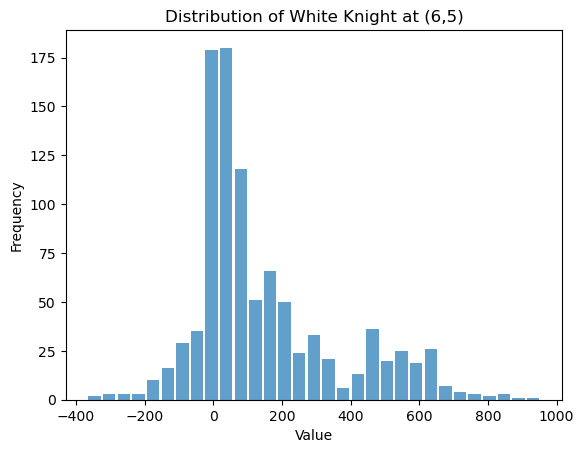

In [23]:
create_histogram(df[0][4][5][0],0,4,5,0)

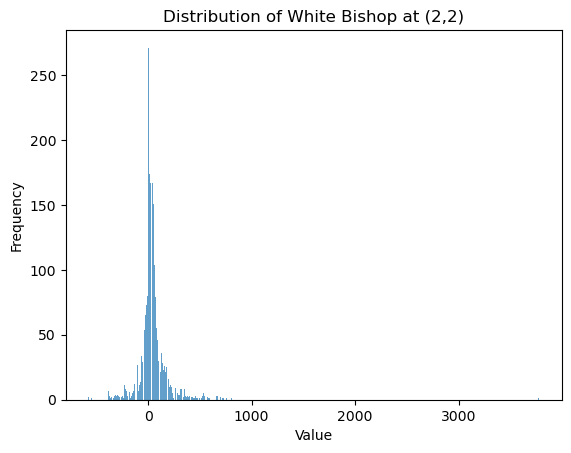

In [29]:
create_histogram(df[1][1][1][0],1,1,1,0)